In [1]:
# Donald B
# Dr. Ofori
# Topic 5 DQ 2 (DSC - 510)
# 16 October 2023
# YouTube Link: https://youtu.be/QdO6YMNTnQk

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy.stats as stats

In [ ]:
# Linear regression is a powerful tool for modeling relationships between variables in a dataset. 
# However, there are limitations to linear regression that may result in biased or inaccurate predictions. 

# How can Python be used to diagnose and address violations of these assumptions in a linear regression model? 
# Provide at least one example of a linear regression model that violates one of these assumptions and how it can be improved. 

In [ ]:
_='''
5 assumptions of linear regression models and the potential consequences of violating these assumptions:
How can Python be used to diagnose and address violations of these assumptions in a linear regression model? 

    # Linearity:
The relationship between the independent and dependent variable is linear. This assumption can be checked visually using scatter plots.
If the true relationship is non-linear but a linear model is fit, the model's predictions can be very inaccurate, especially for 
values of the independent variable that are outside the range of the data used to fit the model
When the true relationship between variables is non-linear and you fit a linear model, the slope and coefficients of the regression
equation can be biased.

   # Independence:
This assumes that the residual errors are independent of each other.
One method to check for independence is by plotting residuals against the predicted values or against 
time (in time-series data). If there is a pattern in the residuals, it suggests that the errors might not be independent.
Violating the independence assumption in linear regression can have several negative effects on the model. First, it can lead 
to inefficient parameter estimates. Specifically, the standard errors of the coefficients might be underestimated, which in turn 
leads to overconfidence in the accuracy of the model's coefficients. Also, the predictions made by the  model become less reliable. 
    
    # Homoscedasticity (Equal Variance): 
The residuals display consistent variance across all values of the independent variables.
This can be checked visually using a plot of residuals vs. predicted values. Ideally, in this plot, you want to see a random 
scatter of points without any apparent pattern. If there is a funnel shape or any other systematic trend, 
it suggests that the variance of the residuals is not consistent across the range of predicted values, indicating heteroscedasticity.
If the assumption is violated (heteroscedasticity), it might be necessary to transform the dependent variable (e.g., log transformation).
If the equal variance assumption is violated, the model's estimates can be less accurate, less efficient, and less trustworthy, 
and it can be harder to make precise conclusions about the relationships between variables.
   
   # Normality:
In linear regression, accurate hypothesis tests, like determining the significance of coefficients using t-tests and F-tests, 
require the residuals to follow a roughly normal distribution.
We can check this assumption by creating a histogram of residuals or density plot which provides a
visual check on the assumption of normality. If the histogram looks roughly bell-shaped, the assumption is most likely met.
We can also use an Q-Q Plot (Quantile-Quantile Plot): In a Q-Q plot, the quantiles of the residuals are plotted against 
the quantiles of a standard normal distribution. If the residuals are normally distributed, the points should roughly 
fall on a straight line.

    # Multicollinearity does not exist:
Multicollinearity exists when two or more independent variables are highly correlated, meaning one can be 
linearly predicted from the others. This can inflate the variance of the coefficient estimates and make the 
estimates very sensitive to minor changes in the model. This can be checked using the Variance Inflation Factor (VIF).
If multicollinearity is detected, solutions include removing one of the correlated variables, 
combining correlated variables, or using regularization techniques like Ridge or Lasso regression.
I also like to take a look at a correlation matrix to evaluate the variables to get an idea of highly correlated variables that may 
lead to high VIF values.
    
'''

In [4]:
data = pd.read_csv('/Users/don/Downloads/dataproject.csv', header=1) # setting header to be second row in the file.

# Print columns and head to check
print(data.columns)
#print(data.head())

Index(['Year (2010-2018)', 'Team', 'Winning %',
       'Latest Playoff Round (0 is missed playoffs, 5 is champion)',
       'Pts/Game', 'Pts/Game Over Average', 'Pts Allowed/Game',
       'Pts Allowed/Game Over Average (Negative is Better)', 'Pace',
       'Pace Over Average', 'Assist %', '3PT ATT Rate', 'FTA/Game',
       'Players in Top 25 of PER',
       'Average PER (Top 8 Players in mins played)', 'Net Rating', '3%',
       'FG %', 'DRB', 'POlast'],
      dtype='object')


In [5]:
# Rename columns for convenience and to remove special characters
data.rename(columns={
    'Year (2010-2018)': 'Year',
    'Latest Playoff Round (0 is missed playoffs, 5 is champion)': 'Latest Playoff Round',
    'Pts/Game': 'PtsPerGame',
    'Pts/Game Over Average': 'PtsPerGameOverAverage',
    'Pts Allowed/Game': 'PtsAllowedPerGame',
    'Pts Allowed/Game Over Average (Negative is Better)': 'PtsAllowedPerGameOverAverage',
    '3PT ATT Rate': 'ThreePointAttemptRate',
    'FTA/Game': 'FTAGame',
    'Players in Top 25 of PER': 'PlayersInTop25ofPER',
    'Average PER (Top 8 Players in mins played)': 'AveragePERTop8Players',
    'Net Rating': 'NetRating',
    '3%': 'ThreePercentage',
    'FG %': 'FGPercentage'
}, inplace=True)

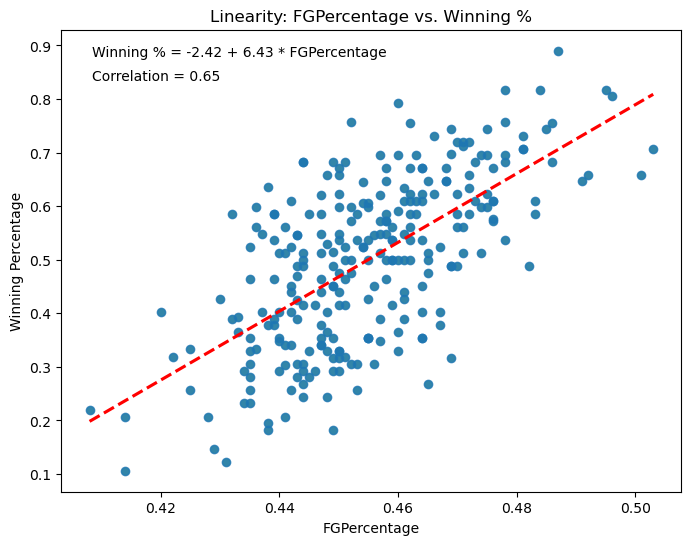

In [6]:
# Linearity
plt.figure(figsize=(8, 6))

# Scatterplot
sns.scatterplot(x=data['FGPercentage'], y=data['Winning %'], alpha=0.5, color='green')

# Regression line
sns.regplot(x=data['FGPercentage'], y=data['Winning %'], ci=None, line_kws={"color": "red", "linestyle": "--"})

plt.xlabel('FGPercentage')
plt.ylabel('Winning Percentage')
plt.title('Linearity: FGPercentage vs. Winning %')

# Fit a linear regression model
model = sm.OLS(data['Winning %'], sm.add_constant(data['FGPercentage'])).fit()

# Get the coefficients
intercept = model.params['const']
slope = model.params['FGPercentage']

# Print the equation of the line on the plot
equation = f'Winning % = {intercept:.2f} + {slope:.2f} * FGPercentage'
plt.text(0.05, 0.95, equation, fontsize=10, transform=plt.gca().transAxes, ha='left', va='center')

# Calculate and display the correlation coefficient
correlation_coefficient = data['FGPercentage'].corr(data['Winning %'])
plt.text(0.05, 0.9, f'Correlation = {correlation_coefficient:.2f}', fontsize=10, transform=plt.gca().transAxes, ha='left', va='center')

plt.show()


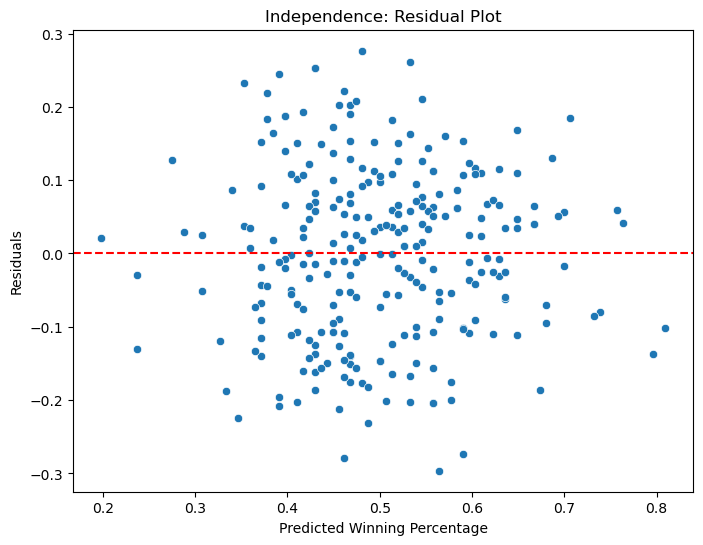

In [7]:
# Independence & Homoscedasticity 
predicted = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(8, 6))
sns.scatterplot(x=predicted, y=residuals)
plt.xlabel('Predicted Winning Percentage')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Independence: Residual Plot')
plt.show()

# The residual plot contains random scatter and no patterns; safe to say that the variables are independent 
# The residual plot has equal variance 

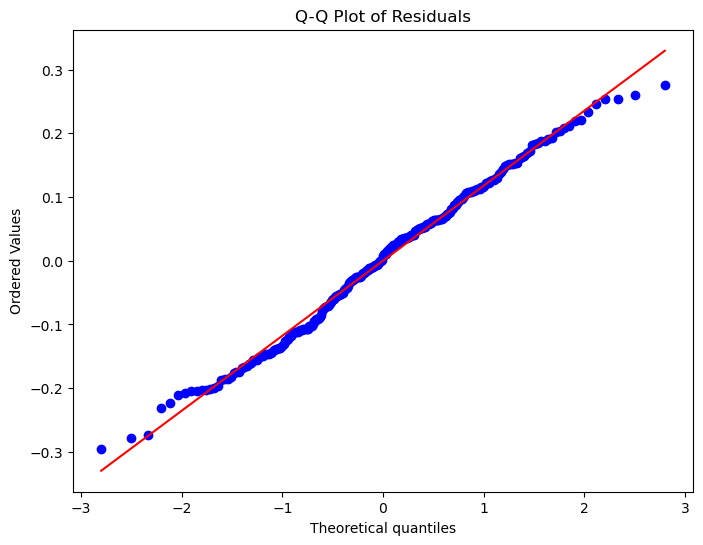

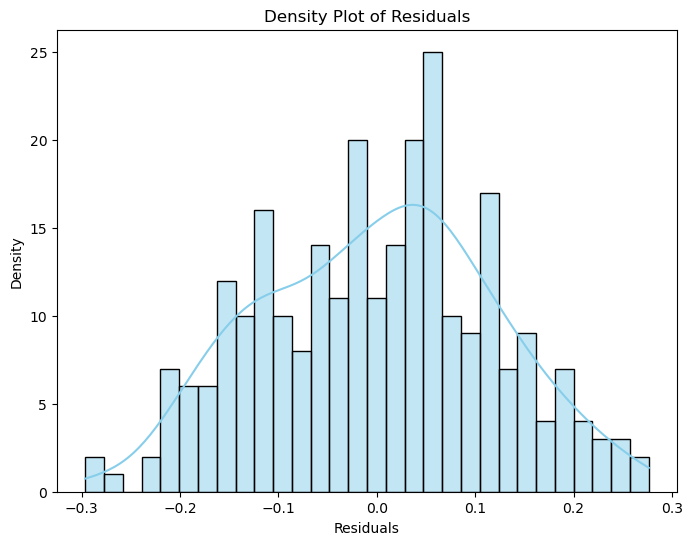

In [13]:
# Normality 
# Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Density Plot using histplot
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title('Density Plot of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

_='''
the Q-Q plot indicates that residuals align closely with a normal distribution. The density plot further supports this, 
displaying a bell-shaped curve. While minor deviations are observed, they're typical in real-world data and unlikely to 
invalidate our regression analysis. Based on these visuals, the normality assumption appears to be met.
'''

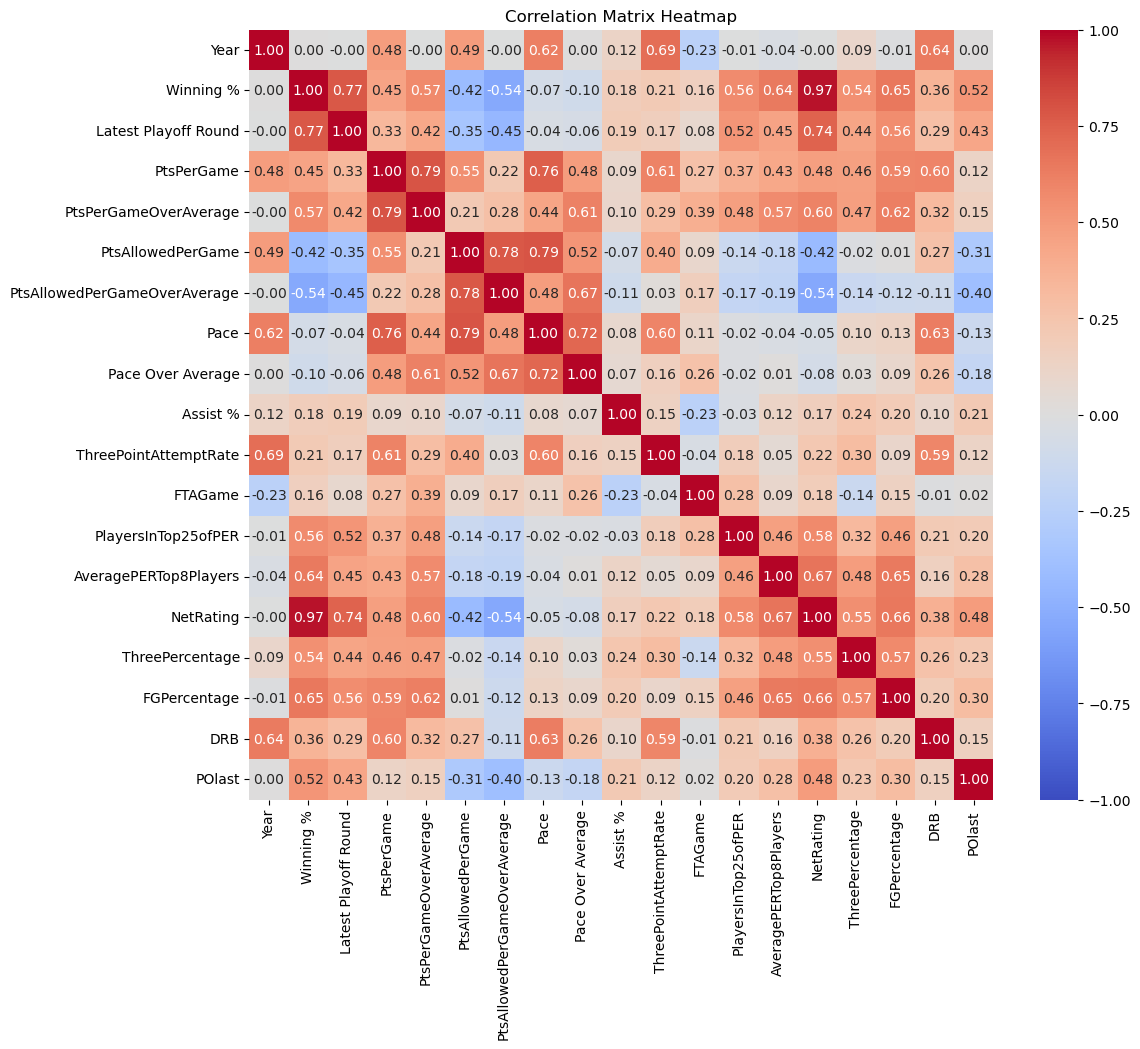

In [14]:
# Multicollinearity (Checking Variation Inflation Factors) 
correlation_matrix = data.corr(numeric_only=True)
#print(correlation_matrix)


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [15]:
# Multicollinearity (Checking Variation Inflation Factors) 
_='''
In our current regression model, we are only utilizing a single predictor variable, FGPercentage. 
Consequently, multicollinearity isn't an issue in this specific context. However, as we transition towards a multiple 
linear regression model with additional predictor variables, multicollinearity may arise as a potential concern and would 
warrant a thorough examination to ensure the reliability and interpretability of the model coefficients.
'''

X = data[['FGPercentage', 'ThreePercentage', 'PtsAllowedPerGame', 'Pace', 'NetRating' ]]  # Replace with your independent variables
                                                                                          # Do not include response/ dependent variable
X = sm.add_constant(X)  # adding a constant

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


# Typically, a VIF value greater than 10 indicates high multicollinearity. 
# There seems to be an issue of multicollinearity. Lets try removing highly correlated variables 

            Variable          VIF
0              const  2901.293612
1       FGPercentage     2.411423
2    ThreePercentage     1.672366
3  PtsAllowedPerGame     5.599823
4               Pace     3.939365
5          NetRating     4.001784


In [16]:
# Typically, a VIF value greater than 10 indicates high multicollinearity. 
# There seems to be an issue of multicollinearity. Lets try removing highly correlated variables 

X = data[['FGPercentage', 'ThreePercentage', 'PtsAllowedPerGame', 'Pace']]  # Replace with independent variables
X = sm.add_constant(X)  # adding a constant

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

            Variable          VIF
0              const  1683.461825
1       FGPercentage     1.512575
2    ThreePercentage     1.506630
3  PtsAllowedPerGame     2.776973
4               Pace     2.826801


In [ ]:
# Youtube Video: https://youtu.be/QdO6YMNTnQk


# Reference(s): 
# Dang, S., Chaudhury, S., Lall, B., & Roy, P. K. (2015). Assessing assumptions of multivariate linear regression 
    # framework implemented for directionality analysis of fMRI. 2015 37th Annual International Conference of the IEEE Engineering
    # in Medicine and Biology Society (EMBC), Engineering in Medicine and Biology Society (EMBC), 2015 37th Annual International 
    # Conference of the IEEE, 2868–2871. https://doi-org.lopes.idm.oclc.org/10.1109/EMBC.2015.7318990

In [ ]:
_-''' 
A piece of text by accredited individuals that emphasize the importance of meeting the assumption requirted to run an
accurate and efficient linear regression model and the impact it has when the conditions are not met.
Granger formalized Wiener's idea of temporal ordering in terms of linear regressive models of 
(1) stationary time- series; with the underlying assumptions of (2) linearity and additivity of dependent and 
independent variables of the model; where residues of the model are (3) serially uncorrelated; (4) homoscedastic; 
and (5) normally distributed. If any of these assumptions is violated (i.e., if there are nonlinear relationships
or the errors exhibit correlation, heteroscedasticity, or non-normality), then the insights yielded by a 
regression model may be at question. Thus, a complete diagnosis of the problem at hand is essential before 
coming up with any misleading results. (Dang, Chaudhury, Lall, & Roy, 2015).
'''

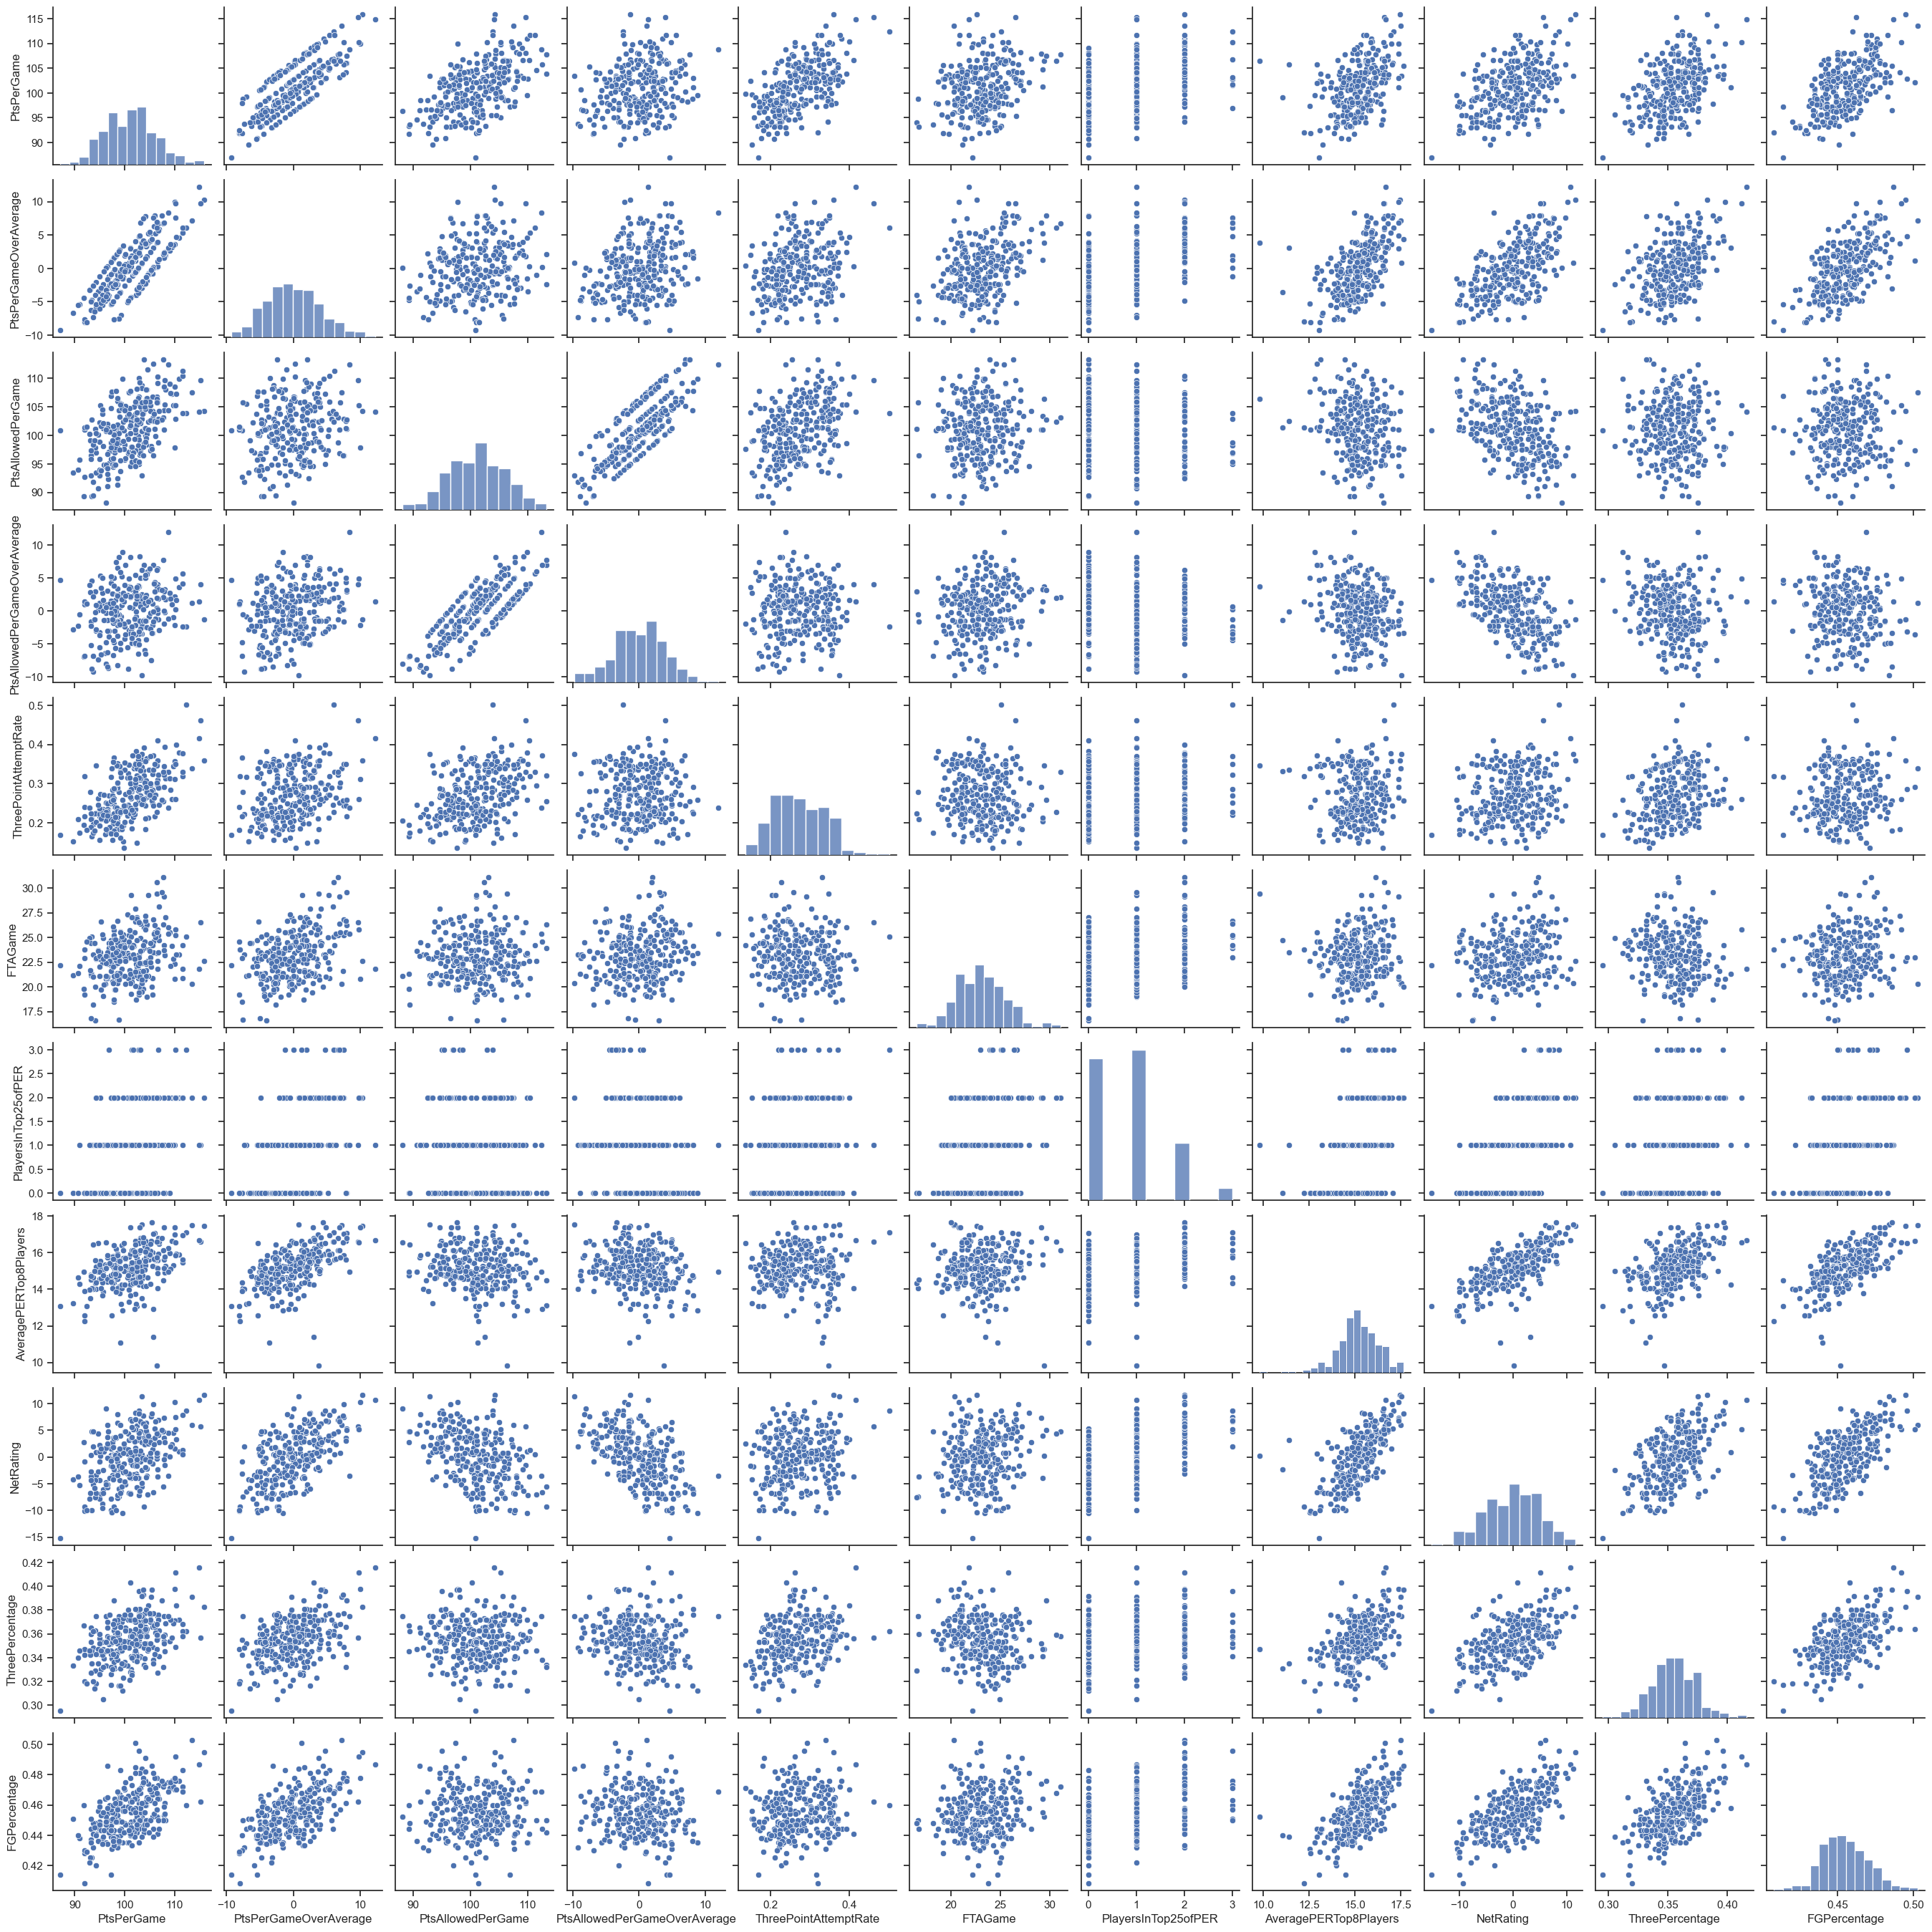

In [19]:
# List of variables you want to create scatter plots for
variables = [
    'PtsPerGame',
    'PtsPerGameOverAverage',
    'PtsAllowedPerGame',
    'PtsAllowedPerGameOverAverage',
    'ThreePointAttemptRate',
    'FTAGame',
    'PlayersInTop25ofPER',
    'AveragePERTop8Players',
    'NetRating',
    'ThreePercentage',
    'FGPercentage'
]

# Create pair plots for all possible pairs of variables
sns.set(style="ticks")
sns.pairplot(data[variables])
plt.show()
